In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

%matplotlib inline

In [0]:
def encoder(x, output_channels, encoder_scope, reuse=False, training=False, strides=2):
  with tf.variable_scope(encoder_scope) as scope:
    if (reuse):
        tf.get_variable_scope().reuse_variables()

    x = tf.layers.conv2d(
      x,
      output_channels,
      3,
      strides=(strides, strides),
      padding='same',
    )
    
    x = tf.layers.batch_normalization(x, training=training)
    x = tf.nn.leaky_relu(
      x,
      alpha=0.05,
    )
    
    return x

In [0]:
def decoder(x, output_channels, decoder_scope, reuse=False, training=False):
  with tf.variable_scope(decoder_scope) as scope:
    if (reuse):
        tf.get_variable_scope().reuse_variables()

    x = tf.layers.conv2d_transpose(
      x,
      output_channels,
      3,
      strides=(2, 2),
      padding='same',
    )
    
    x = tf.layers.batch_normalization(x, training=training)
    x = tf.nn.leaky_relu(
      x,
      alpha=0.05,
    )
    
    return x

In [0]:
# output = encoder(input_x, 64, 'encoder', False, True)

In [0]:
# to_concatenate=tf.zeros([1, 32, 32, 64])

In [0]:
# input_decoder = tf.concat([to_concatenate, output], axis=3)

In [0]:
# output = decoder(input_decoder, 3, 'decode', False, True)

W0706 05:14:55.707604 140624040990592 deprecation.py:323] From <ipython-input-3-033181d19e17>:11: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [0]:
# print(output)

Tensor("decode/LeakyRelu:0", shape=(1, 64, 64, 3), dtype=float32)


In [0]:
# print(input_decoder)

Tensor("concat_1:0", shape=(1, 32, 32, 128), dtype=float32)


In [0]:
def generator(x, reuse=False, training=False):
  # input shape is 64x64x3
  with tf.variable_scope('generator') as scope:
    x1 = encoder(x, 64, 'g_encoder_1', reuse, training)
    x2 = encoder(x1, 128, 'g_encoder_2', reuse, training)
    latent_vec = encoder(x2, 256, 'g_encoder_3', reuse, training)

    #Latent vector 5x8x256
    d1 = decoder(latent_vec, 128, 'd_encoder_1', reuse, training)
    d2 = decoder(tf.concat([d1, x2], axis=3), 64, 'd_encoder_2', reuse, training)
#     d3 = decoder(tf.concat([d2, x1], axis=3), 3, 'd_encoder_3', reuse, training)

    x = tf.layers.conv2d_transpose(
      d2,
      3,
      3,
      strides=(2, 2),
      padding='same',
      reuse=reuse
    )
    
    return x

In [7]:
input_x = tf.zeros([1, 64, 64, 3])
print(generator(input_x, reuse=False))

W0813 05:16:33.236022 140263588931456 deprecation.py:323] From <ipython-input-2-6300142603d9>:14: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
W0813 05:16:33.366061 140263588931456 deprecation.py:323] From <ipython-input-3-033181d19e17>:11: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


Tensor("generator_2/conv2d_transpose/BiasAdd:0", shape=(1, 64, 64, 3), dtype=float32)


In [0]:
# in_x is the real input image, and gen_x is the generated image. both are 64x64x3

def discriminator(in_x, gen_x, reuse=False, training=False):
  with tf.variable_scope('discriminator') as scope:
    dis_input = tf.concat([in_x, gen_x], axis=3)
    # 64, 64, 128
    x1 = encoder(dis_input, 128, 'd_encoder_1', reuse, training)
    # 32, 32, 256
    x2 = encoder(x1, 256, 'd_encoder_2', reuse, training)
    # 16, 16, 512
    x3 = encoder(x2, 512, 'd_encoder_3', reuse, training, strides=1)
    # 30, 30, 1
    output = tf.layers.conv2d(
      x3,
      1,
      3,
      strides=(1, 1),
      padding='same',
      reuse=reuse
    )
    
    return output

In [0]:
# input_dis = tf.zeros([1, 64, 64, 3])

In [0]:
# print(discriminator(input_dis, input_dis))

Tensor("discriminator/conv2d/BiasAdd:0", shape=(1, 16, 16, 1), dtype=float32)


Download the dataset

In [0]:
dataset = 'facades'

In [10]:
_URL = 'https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/'+dataset+'.tar.gz'
path_to_zip = tf.keras.utils.get_file('/content/'+dataset+'.tar.gz',
                                      origin=_URL,
                                      extract=True)

30171136/30168306 [==============================] - 2s 0us/step


In [11]:
!tar xvzf facades.tar.gz

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/test/19.jpg
facades/test/2.jpg
facades/test/20.jpg
facades/test/21.jpg
facades/test/22.jpg
facades/test/23.jpg
facades/test/24.jpg
facades/test/25.jpg
facades/test/26.jpg
facades/test/50.jpg
facades/test/51.jpg
facades/test/52.jpg
facades/test/53.jpg
facades/test/54.jpg
facades/test/55.jpg
facades/test/56.jpg
facades/test/57.jpg
facades/test/58.jpg
facades/test/59.jpg
facades/test/6.jpg
facades/test/60.jpg
facades/test/61.jpg
facades/test/62.jpg
facades/test/63.jpg
facades/test/64.jpg
facades/test/65.jpg
facades/test/66.jpg
facades/test/67.jpg
facades/test/6

Loading the files

In [0]:
def get_training_data():
    import matplotlib.image as mpimg
    def load_images(folder):
        training_data = []
        
        for filename in os.listdir(folder):
            img = mpimg.imread(os.path.join(folder, filename))
            if img is not None:
                img = Image.fromarray(img)
                img = img.resize((128,64),Image.ANTIALIAS)
                pixel_array = np.asarray(img)
                if pixel_array.shape == (64, 128, 3):
                    training_data.append(pixel_array)
        return training_data
    
    return load_images(dataset+"/train")

In [0]:
training_data = []
training_data = get_training_data()

In [14]:
len(training_data)

400

In [0]:
def get_batch(batch_size=16):
  batch = []
  
  import random
  
  for i in range(batch_size):
    

    image = training_data[random.randint(0, len(training_data)-1)]
    w = np.shape(image)[1]
    w = w // 2
    real_image = (image[:, :w, :]/127.5) - 1.
    input_image = (image[:, w:, :]/127.5) - 1.
    
  
    batch.append([real_image, input_image])
    
  return np.array(batch)

In [16]:
get_batch().shape

(16, 2, 64, 64, 3)

In [0]:
image = get_batch()[10]

W0813 05:17:12.047782 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(16, 2, 64, 64, 3)

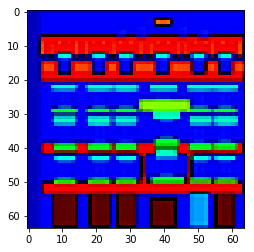

In [18]:
plt.figure()
plt.imshow(image[1])

get_batch().shape

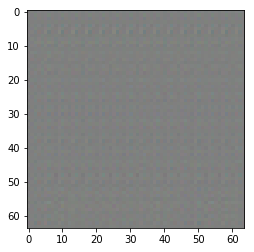

In [20]:
with tf.Session() as sess:
  test_placeholder = tf.placeholder(tf.float32, [1, 64, 64, 3])
  sess.run(tf.global_variables_initializer())
  out = sess.run(generator(test_placeholder, reuse=True), feed_dict={test_placeholder: [image[1]]})
  
  my_i = out.squeeze()
  plt.imshow((my_i + 1.)/2.)
  plt.show()

In [0]:
def discriminator_loss(disc_real_output, disc_generated_output):
  generated_loss = tf.reduce_mean(
      tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(disc_generated_output), logits=disc_generated_output)
  )
  
  real_loss = tf.reduce_mean(
      tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(disc_real_output), logits=disc_real_output)
  )
  
  total_disc_loss = real_loss + generated_loss
  
  return total_disc_loss

In [0]:
def generator_loss(disc_generated_output, gen_output, target):
  LAMBDA = 100

  gan_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(disc_generated_output), logits=disc_generated_output)
  )
  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss

In [0]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

In [0]:
!mkdir checkpoints
!mkdir checkpoints/train

In [0]:
def train(epoch_count, learning_rate, beta1):
    """
    Train the GAN
    """
    
    target = tf.placeholder(tf.float32, shape=(1, 64, 64, 3), name='target')
    input_image = tf.placeholder(tf.float32, shape=(1, 64, 64, 3), name='input_image')
    
    gen_output = generator(input_image)
    disc_real_output = discriminator(input_image, target, reuse=False, training=True)
    disc_generated_output = discriminator(input_image, gen_output, reuse=True, training=True)
    
    d_loss = discriminator_loss(disc_real_output=disc_real_output, disc_generated_output=disc_generated_output)
    g_loss = generator_loss(disc_generated_output=disc_generated_output, gen_output=gen_output, target=target)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):

            # values range from -0.5 to 0.5, therefore scale to range -1, 1
            image = get_batch()[0]
            
            _target = [image[0]]
            _input_image = [image[1]]

            

            _ = sess.run(d_opt, feed_dict={target: _target, input_image: _input_image})
            _ = sess.run(g_opt, feed_dict={target: _target, input_image: _input_image})

            if steps % 100 == 0:
                # At the end of every 10 epochs, get the losses and print them out
                train_loss_d = d_loss.eval({target: _target, input_image: _input_image})
                train_loss_g = g_loss.eval({target: _target, input_image: _input_image})

                print("Epoch {}/{}...".format(epoch_i+1, epochs),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))
                
                test_placeholder = tf.placeholder(tf.float32, [1, 64, 64, 3])
#                 sess.run(tf.global_variables_initializer())
                out = sess.run(generator(test_placeholder, reuse=True), feed_dict={test_placeholder: _input_image})

                my_i = out.squeeze()
                print("OUTPUT IMAGE")
                plt.imshow((my_i + 1.)/2.)
                plt.show()
          
                print("INPUT IMAGE")
                plt.imshow((_input_image[0] + 1.)/2.)
                plt.show()
                
#                 _ = show_generator_output(sess, 1, input_z, 3)

#                 generate_images(generator, inp, tar)
            steps += 1

  

W0813 05:18:03.638412 140263588931456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10000... Discriminator Loss: 1.4389... Generator Loss: 41.7735
OUTPUT IMAGE


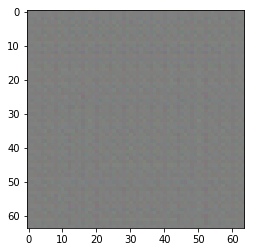

INPUT IMAGE


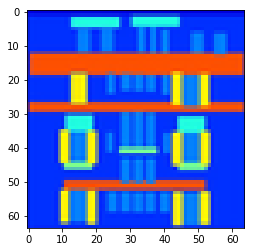

Epoch 101/10000... Discriminator Loss: 0.4619... Generator Loss: 36.7095
OUTPUT IMAGE


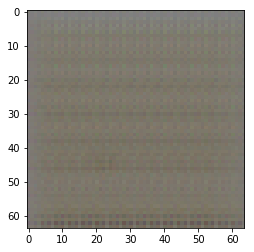

INPUT IMAGE


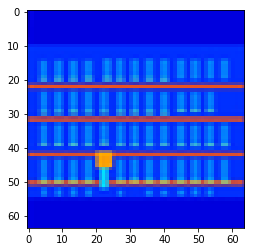

Epoch 201/10000... Discriminator Loss: 0.1738... Generator Loss: 46.8157
OUTPUT IMAGE


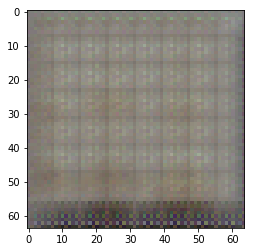

INPUT IMAGE


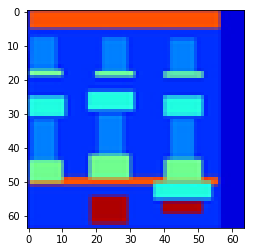

Epoch 301/10000... Discriminator Loss: 0.1708... Generator Loss: 32.1923
OUTPUT IMAGE


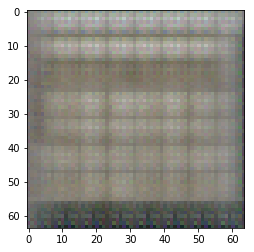

INPUT IMAGE


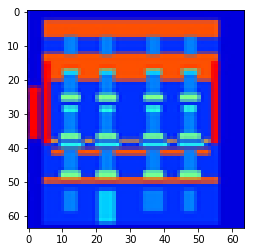

Epoch 401/10000... Discriminator Loss: 0.1769... Generator Loss: 34.1782
OUTPUT IMAGE


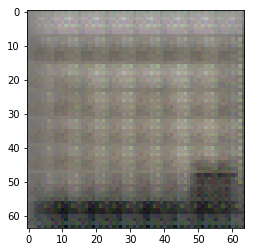

INPUT IMAGE


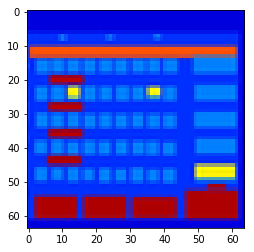

Epoch 501/10000... Discriminator Loss: 0.1776... Generator Loss: 33.6221


W0813 05:18:15.358455 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


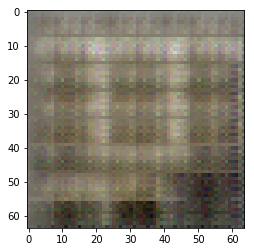

INPUT IMAGE


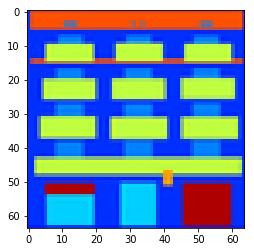

Epoch 601/10000... Discriminator Loss: 0.1579... Generator Loss: 31.9367
OUTPUT IMAGE


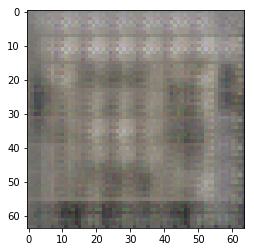

INPUT IMAGE


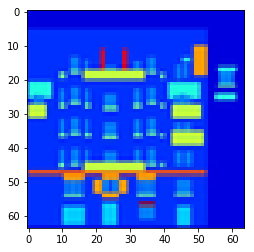

Epoch 701/10000... Discriminator Loss: 0.2059... Generator Loss: 28.9697


W0813 05:18:19.167024 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


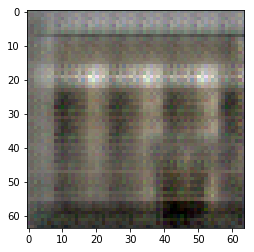

INPUT IMAGE


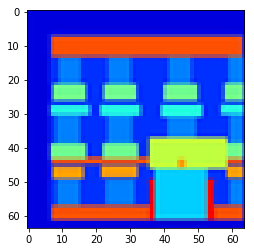

Epoch 801/10000... Discriminator Loss: 0.1763... Generator Loss: 30.2148


W0813 05:18:21.058662 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


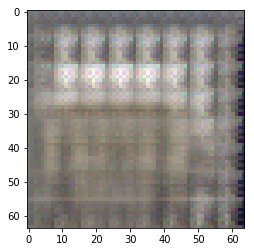

INPUT IMAGE


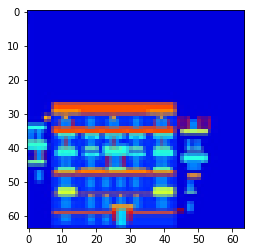

Epoch 901/10000... Discriminator Loss: 0.2780... Generator Loss: 26.6176


W0813 05:18:22.945397 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


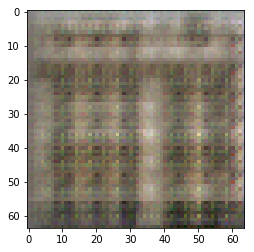

INPUT IMAGE


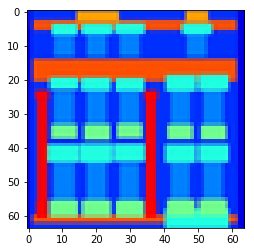

Epoch 1001/10000... Discriminator Loss: 0.1535... Generator Loss: 33.9254


W0813 05:18:25.082777 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


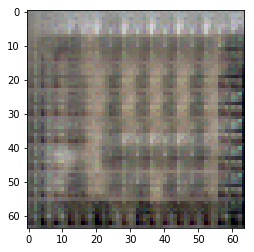

INPUT IMAGE


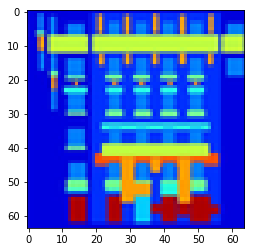

Epoch 1101/10000... Discriminator Loss: 0.1124... Generator Loss: 32.7358


W0813 05:18:27.029210 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


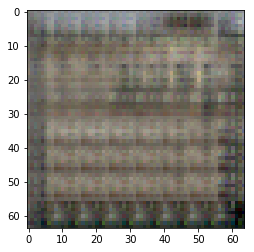

INPUT IMAGE


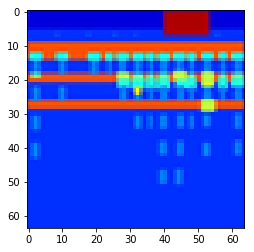

Epoch 1201/10000... Discriminator Loss: 0.2014... Generator Loss: 30.5732
OUTPUT IMAGE


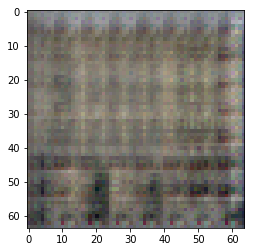

INPUT IMAGE


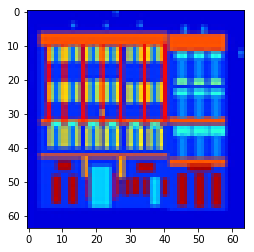

Epoch 1301/10000... Discriminator Loss: 0.4065... Generator Loss: 35.2488


W0813 05:18:30.864268 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


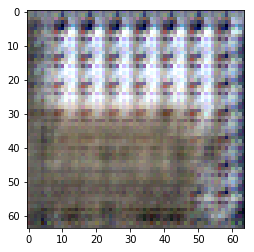

INPUT IMAGE


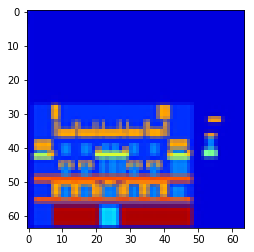

Epoch 1401/10000... Discriminator Loss: 0.0499... Generator Loss: 32.4049
OUTPUT IMAGE


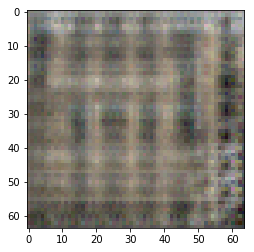

INPUT IMAGE


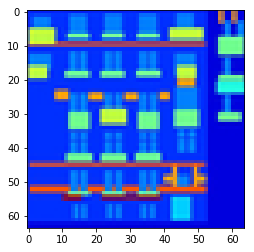

Epoch 1501/10000... Discriminator Loss: 0.3948... Generator Loss: 38.3293


W0813 05:18:34.718029 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


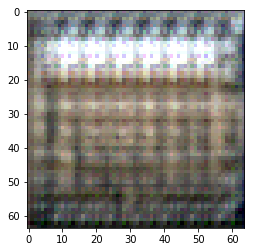

INPUT IMAGE


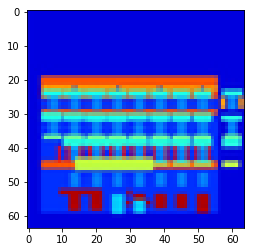

Epoch 1601/10000... Discriminator Loss: 0.0696... Generator Loss: 33.6654


W0813 05:18:36.644804 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


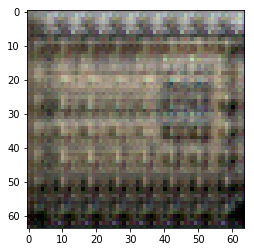

INPUT IMAGE


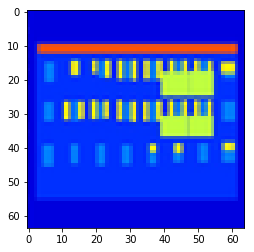

Epoch 1701/10000... Discriminator Loss: 0.2430... Generator Loss: 33.0187


W0813 05:18:38.571181 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


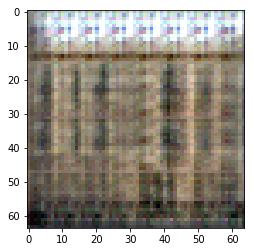

INPUT IMAGE


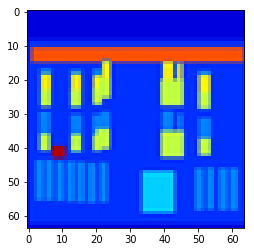

Epoch 1801/10000... Discriminator Loss: 0.0553... Generator Loss: 44.0445


W0813 05:18:40.524150 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


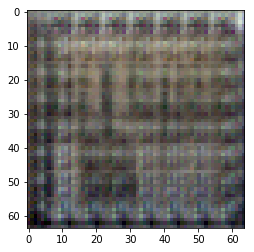

INPUT IMAGE


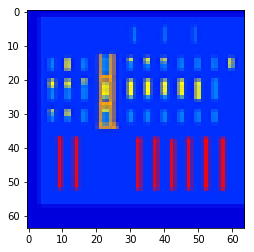

Epoch 1901/10000... Discriminator Loss: 0.1628... Generator Loss: 37.7553


W0813 05:18:42.507144 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


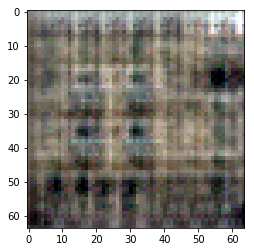

INPUT IMAGE


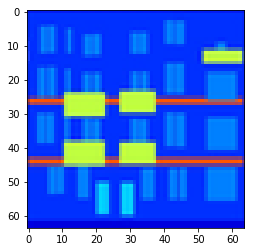

Epoch 2001/10000... Discriminator Loss: 0.2438... Generator Loss: 31.0367


W0813 05:18:44.667325 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


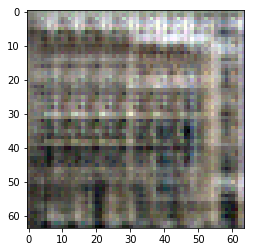

INPUT IMAGE


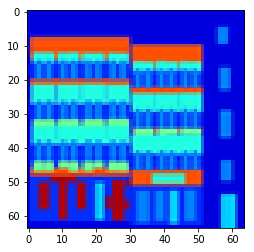

Epoch 2101/10000... Discriminator Loss: 0.1132... Generator Loss: 47.4582


W0813 05:18:46.653760 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


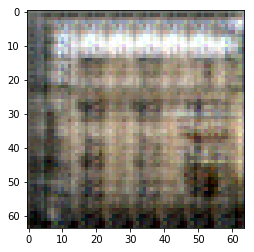

INPUT IMAGE


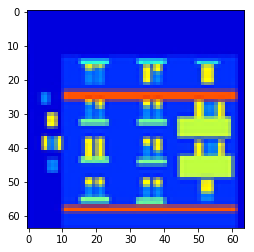

Epoch 2201/10000... Discriminator Loss: 0.1155... Generator Loss: 42.2352


W0813 05:18:48.607174 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


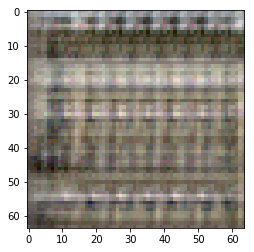

INPUT IMAGE


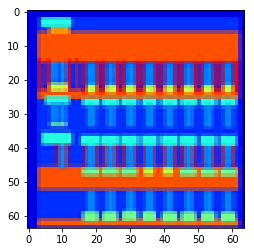

Epoch 2301/10000... Discriminator Loss: 0.0404... Generator Loss: 36.5926


W0813 05:18:50.556198 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


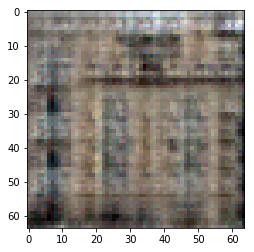

INPUT IMAGE


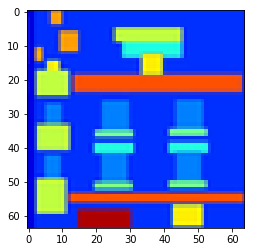

Epoch 2401/10000... Discriminator Loss: 0.2525... Generator Loss: 27.5407


W0813 05:18:52.532455 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


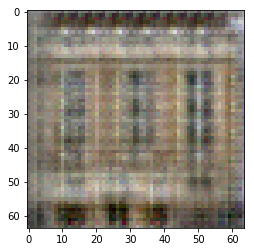

INPUT IMAGE


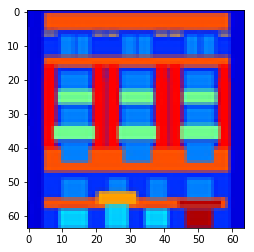

Epoch 2501/10000... Discriminator Loss: 0.4970... Generator Loss: 41.6575


W0813 05:18:54.495832 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


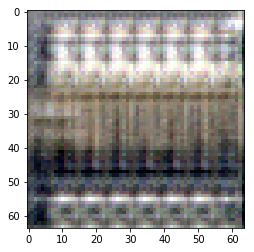

INPUT IMAGE


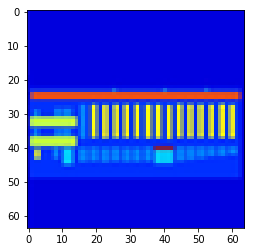

Epoch 2601/10000... Discriminator Loss: 0.7869... Generator Loss: 22.5204


W0813 05:18:56.457887 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


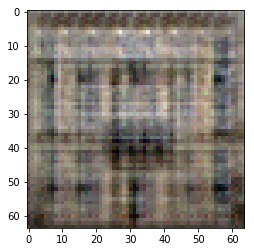

INPUT IMAGE


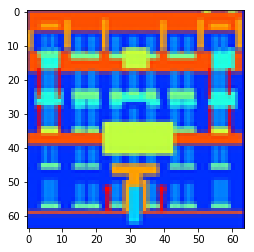

Epoch 2701/10000... Discriminator Loss: 0.0483... Generator Loss: 42.0994


W0813 05:18:58.435820 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


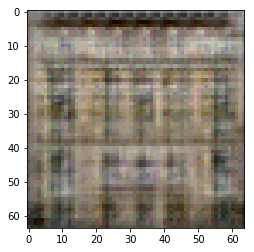

INPUT IMAGE


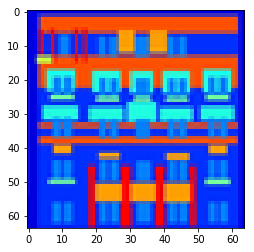

Epoch 2801/10000... Discriminator Loss: 0.3369... Generator Loss: 24.0601


W0813 05:19:00.391274 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


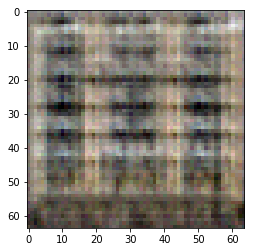

INPUT IMAGE


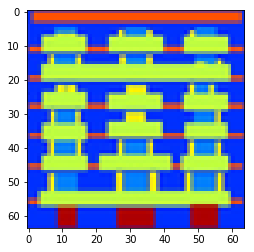

Epoch 2901/10000... Discriminator Loss: 0.1439... Generator Loss: 31.6340


W0813 05:19:02.369292 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


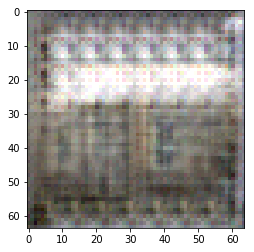

INPUT IMAGE


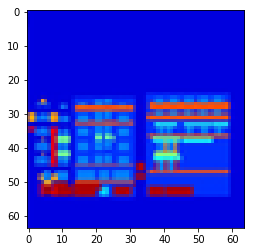

Epoch 3001/10000... Discriminator Loss: 0.0378... Generator Loss: 36.7417


W0813 05:19:04.322087 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


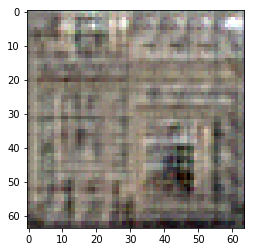

INPUT IMAGE


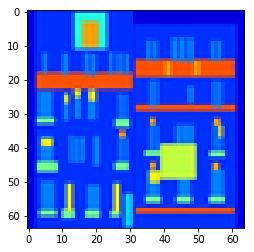

Epoch 3101/10000... Discriminator Loss: 0.0983... Generator Loss: 43.6064


W0813 05:19:06.556006 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


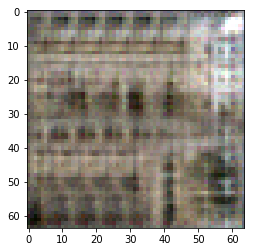

INPUT IMAGE


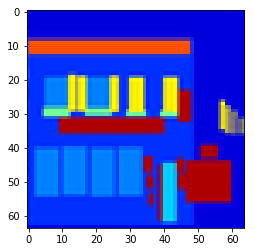

Epoch 3201/10000... Discriminator Loss: 0.0558... Generator Loss: 33.3654


W0813 05:19:08.535115 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


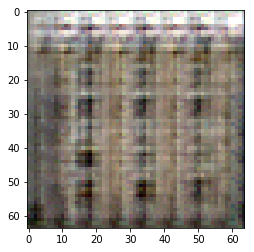

INPUT IMAGE


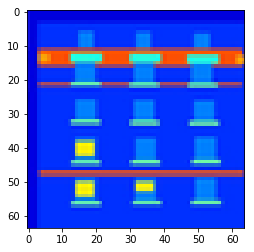

Epoch 3301/10000... Discriminator Loss: 0.1724... Generator Loss: 38.7669


W0813 05:19:10.524835 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


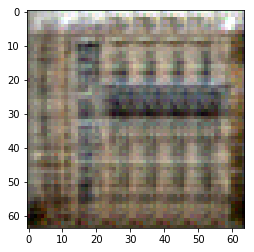

INPUT IMAGE


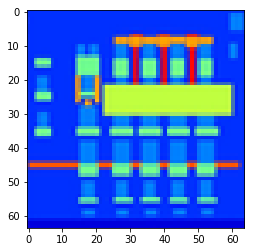

Epoch 3401/10000... Discriminator Loss: 0.2865... Generator Loss: 31.7293


W0813 05:19:12.580933 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


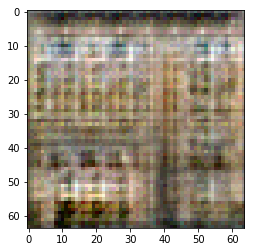

INPUT IMAGE


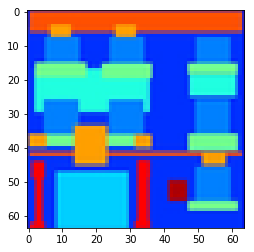

Epoch 3501/10000... Discriminator Loss: 1.1062... Generator Loss: 41.8324


W0813 05:19:14.579716 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


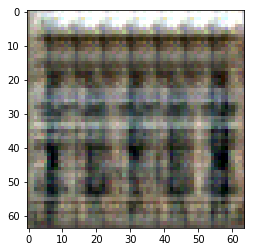

INPUT IMAGE


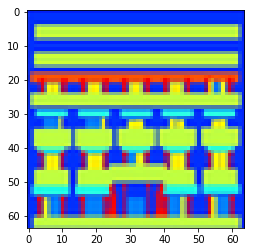

Epoch 3601/10000... Discriminator Loss: 0.0837... Generator Loss: 39.6400


W0813 05:19:16.590842 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


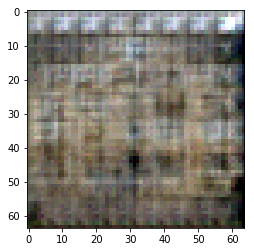

INPUT IMAGE


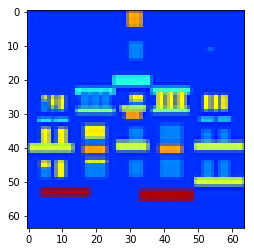

Epoch 3701/10000... Discriminator Loss: 0.1095... Generator Loss: 39.9742


W0813 05:19:18.601361 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


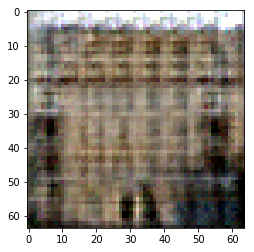

INPUT IMAGE


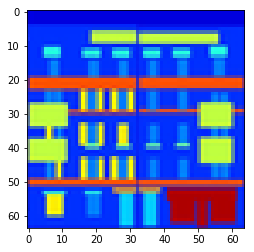

Epoch 3801/10000... Discriminator Loss: 0.0305... Generator Loss: 45.1977


W0813 05:19:20.608688 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


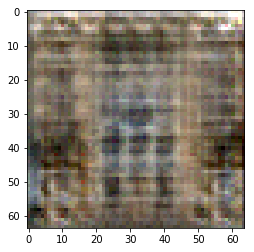

INPUT IMAGE


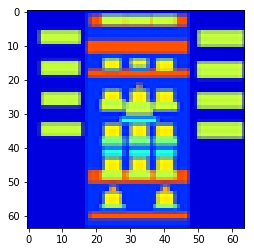

Epoch 3901/10000... Discriminator Loss: 0.1390... Generator Loss: 34.6629


W0813 05:19:22.622728 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


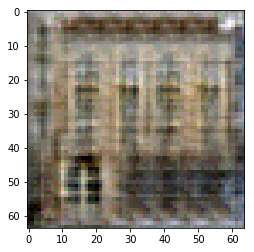

INPUT IMAGE


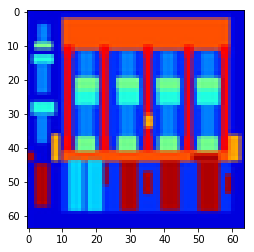

Epoch 4001/10000... Discriminator Loss: 0.0544... Generator Loss: 49.5104


W0813 05:19:24.631608 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


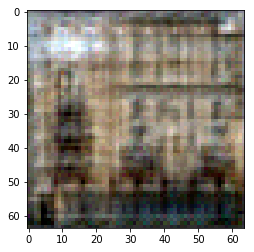

INPUT IMAGE


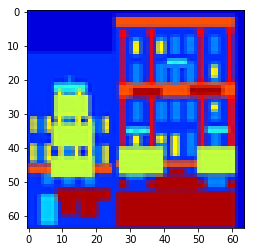

Epoch 4101/10000... Discriminator Loss: 0.2199... Generator Loss: 31.5785


W0813 05:19:26.644435 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


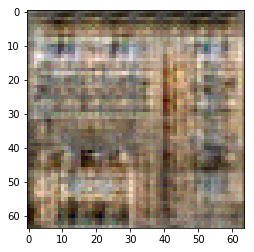

INPUT IMAGE


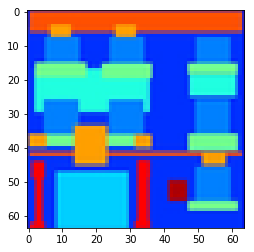

Epoch 4201/10000... Discriminator Loss: 0.1619... Generator Loss: 29.6844


W0813 05:19:28.680629 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


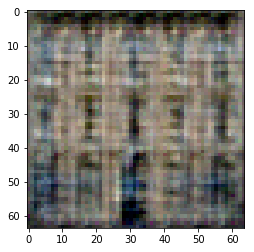

INPUT IMAGE


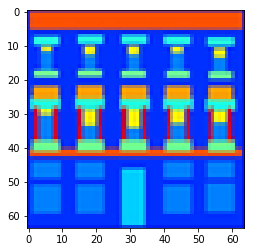

Epoch 4301/10000... Discriminator Loss: 0.1287... Generator Loss: 35.3080


W0813 05:19:30.968791 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


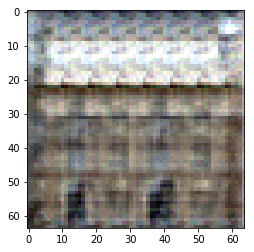

INPUT IMAGE


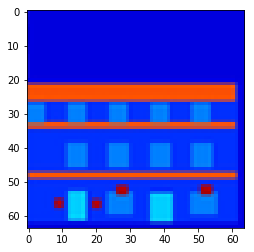

Epoch 4401/10000... Discriminator Loss: 0.0859... Generator Loss: 35.1936


W0813 05:19:33.042761 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


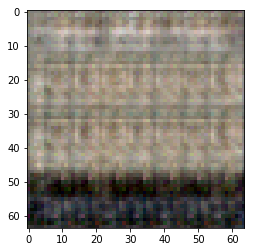

INPUT IMAGE


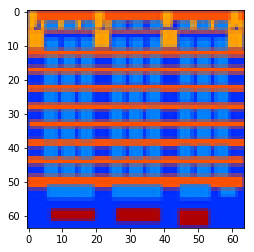

Epoch 4501/10000... Discriminator Loss: 0.1036... Generator Loss: 45.0561


W0813 05:19:35.136425 140263588931456 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


OUTPUT IMAGE


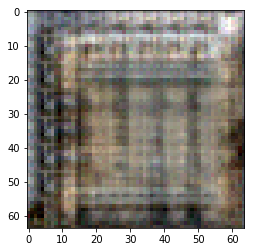

INPUT IMAGE


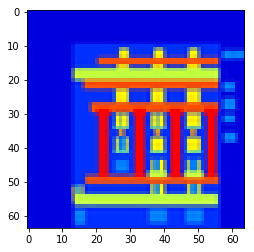

Epoch 4601/10000... Discriminator Loss: 0.1339... Generator Loss: 28.2922


In [0]:
learning_rate = 0.0001
beta1 = 0.5
epochs = 10000

tf.reset_default_graph()
with tf.Graph().as_default():
    train(epochs, learning_rate, beta1)